#  Definição do Projeto

#### Modelo capaz de prever se uma pessoa pode ou não desenvolver diabetes
#### Dataset: Pima Indians Diabetes Data Set http://archive.ics.uci.edu/ml/datasets/diabetes

### Informações sobre os atributos:

1. Número de gravidez
2. Concentração de glicose plasmática a 2 horas em um teste oral de tolerância à glicose
3. Pressão arterial diastólica (mm Hg)
4. Espessura da dobra cutânea do tríceps (mm)
5. Insulina sérica de 2 horas (mu U/ml)
6. Índice de massa corporal (peso em kg/(altura em m)^2)
7. Função hereditária do diabetes
8. Idade (anos)
9. Variável de classe (0 ou 1)

In [156]:
# Importando os dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
%matplotlib inline

In [188]:
# Ignorar os warnings
import warnings
warnings.filterwarnings('ignore')

In [189]:
# Carregando o dataset e renomeando as colunas
arquivo = 'pima-data.csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dados = pd.read_csv(arquivo, names = colunas)

In [190]:
# Visualizando o shape do dataset
dados.shape

(768, 9)

In [191]:
# Visualizando os dados
dados.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [192]:
# Tipos de dados de cada atributo
dados.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [193]:
# Distribuição das classes
dados.groupby('class').size()

class
0    500
1    268
dtype: int64

In [194]:
# Correlação de Pearson
dados.corr(method = 'pearson')

,preg,plas,pres,skin,test,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [195]:
# Verificando o skew de cada atributo
dados.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

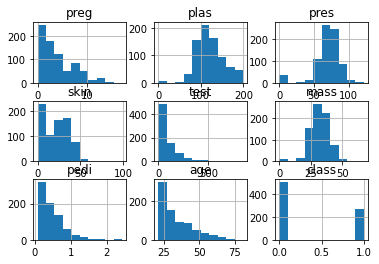

In [196]:
# Histograma para verificar a simetria dos dados
dados.hist()
plt.show()

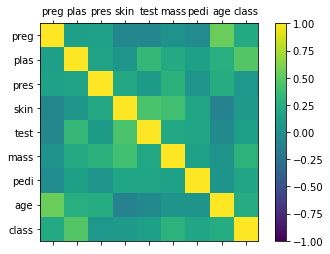

In [197]:
# Matriz de correlação com as variaveis
correlacao = dados.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlacao, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

#### Regressão Logística

In [198]:
## Normalizando os Dados
# Separando o array em compenentes de input X e output Y
array = dados.values
X = array[:,0:8]
Y = array[:,8]

In [199]:
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledX = scaler.fit_transform(X)

In [200]:
#Sumarizando os dados transformados
print("Dados Originais: \n\n", dados.values)
print("\nDados Normalizados: \n\n", rescaledX[0:5,:] )

Dados Originais: 

 [[  6.    148.     72.    ...   0.627  50.      1.   ]
 [  1.     85.     66.    ...   0.351  31.      0.   ]
 [  8.    183.     64.    ...   0.672  32.      1.   ]
 ...
 [  5.    121.     72.    ...   0.245  30.      0.   ]
 [  1.    126.     60.    ...   0.349  47.      1.   ]
 [  1.     93.     70.    ...   0.315  23.      0.   ]]

Dados Normalizados: 

 [[0.35294118 0.74371859 0.59016393 0.35353535 0.         0.50074516
  0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 0.29292929 0.         0.39642325
  0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 0.         0.         0.34724292
  0.25362938 0.18333333]
 [0.05882353 0.44723618 0.54098361 0.23232323 0.11111111 0.41877794
  0.03800171 0.        ]
 [0.         0.68844221 0.32786885 0.35353535 0.19858156 0.64232489
  0.94363792 0.2       ]]


In [201]:
## Usando o método de Redução de Dimensionalidade PCA
# Seleção de atributos
pca = PCA(n_components = 4)
fit = pca.fit(rescaledX)

# Sumarizando os componentes
print("Variância: %s"% fit.explained_variance_ratio_)
print(fit.components_)

Variância: [0.31192249 0.21186663 0.11819693 0.10349153]
[[ 0.65204425  0.24136132  0.22516492 -0.0559239  -0.00386329  0.0520263
   0.01915023  0.67798812]
 [-0.16932416  0.35676608  0.33104032  0.59815466  0.44736849  0.31942511
   0.26749398 -0.05428262]
 [ 0.24628749 -0.69388768  0.45574002  0.38484968 -0.1908919   0.12259645
  -0.19359513 -0.11447898]
 [ 0.51093814 -0.17502202 -0.66594541  0.34250382  0.23019001 -0.04263694
   0.24412554 -0.18197453]]


In [202]:
# Dividindo em Treino e Teste
# Definindo o tamanho das Amostras
teste_size = 0.33

In [203]:
# Criando os conjuntos de treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = teste_size, random_state = 7)

In [204]:
# Criando o modelo
modelo = LogisticRegression()
modelo.fit(X_treino, Y_treino)

LogisticRegression()

In [205]:
# Score do modelo de teste
result = modelo.score(X_teste, Y_teste)
print("Acurácia: %.3f%%" % (result * 100.0))

Acurácia: 78.740%


In [206]:
# Fazendo as previsões e construindo a Confusion Matrix
# Criando o modelo
model = LogisticRegression()
model.fit(X_treino, Y_treino)

LogisticRegression()

In [207]:
# Confusion Matrix
previsoes = model.predict(X_teste)
matrix = confusion_matrix(Y_teste, previsoes)

In [208]:
# Imprimindo a Confusion Matrix
print(matrix)

[[142  20]
 [ 34  58]]


#### Linear Discriminant Analysis

In [209]:
# Separando os dados em folds
kfold = KFold(n_splits=10)

In [210]:
# Criando o modelo
modelo2 = LinearDiscriminantAnalysis()

In [211]:
# Cross Validation
resultado = cross_val_score(modelo2, X, Y, cv = kfold)

In [212]:
# Print do resultado
print("Acurácia: %.3f" % (resultado.mean() * 100))

Acurácia: 77.346


In [213]:
# Preparando a lista de modelos
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))

In [214]:
# Avaliando cada modelo em um loop
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(modelo, X, Y, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.770830 (0.052388)
LDA: 0.773462 (0.051592)


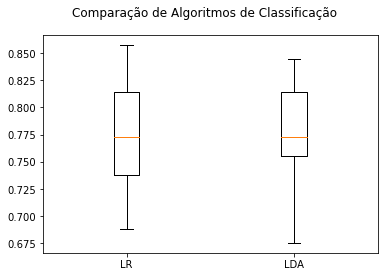

In [215]:
# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()